Using the Titanic dataset, clean up the data (handle missing values either by removal or filling, and transforming non-numerical data into number values) and then build Gaussian and Bernoulli Naive Bayes models to predict Titanic passengers' survival status (1=survived, 0=did not survive). Compare the two models against each other. Did one model perform better than the other? How does the performance of these two models compare to the other classification algorithms, logistic regression and decision trees?

For a bonus challenge, try different methods of preparing your data (cleaning, choosing rows/columns) to see if that affects your results.

In [13]:
import pandas as pd
import matplotlib as plt 
%matplotlib inline 

In [2]:
file = "datasets/titanic.xls"
titanic_df = pd.read_excel(file)
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
dict_1 = {'female': 0, 'male': 1}
titanic_df['sex'] = titanic_df['sex'].map(dict_1)
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
titanic_df['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [5]:
dict_2 = {'S': 0, "C" : 1, "Q": 2}
titanic_df['embarked'] = titanic_df['embarked'].map(dict_2)
titanic_df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,0.0,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,0.0,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,0.0,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,0.0,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,0.0,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",1,48.0000,0,0,19952,26.5500,E12,0.0,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",0,63.0000,1,0,13502,77.9583,D7,0.0,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",1,39.0000,0,0,112050,0.0000,A36,0.0,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",0,53.0000,2,0,11769,51.4792,C101,0.0,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",1,71.0000,0,0,PC 17609,49.5042,NaN,1.0,NaN,22.0,"Montevideo, Uruguay"


In [6]:
#need to expand p_class and survived
titanic_new = titanic_df[["sex", "age", "embarked", "pclass", "survived"]]
titanic_new.head()

,sex,age,embarked,pclass,survived
0,0,29.0000,0.0,1,1
1,1,0.9167,0.0,1,1
2,0,2.0000,0.0,1,0
3,1,30.0000,0.0,1,0
4,0,25.0000,0.0,1,0


In [7]:
titanic_new.isna().sum()

sex           0
age         263
embarked      2
pclass        0
survived      0
dtype: int64

In [8]:
titanic_new = titanic_new.dropna()
titanic_new.isna().sum()

sex         0
age         0
embarked    0
pclass      0
survived    0
dtype: int64

In [9]:
len(titanic_new)

1044

In [10]:
titanic_new = pd.get_dummies(data = titanic_new, columns = ['pclass', 'embarked'])

In [11]:
titanic_new.head()

,sex,age,survived,pclass_1,pclass_2,pclass_3,embarked_0.0,embarked_1.0,embarked_2.0
0,0,29.0000,1,1,0,0,1,0,0
1,1,0.9167,1,1,0,0,1,0,0
2,0,2.0000,0,1,0,0,1,0,0
3,1,30.0000,0,1,0,0,1,0,0
4,0,25.0000,0,1,0,0,1,0,0


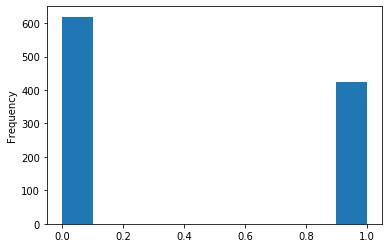

In [14]:
titanic_new['survived'].plot.hist()

In [24]:
mask = titanic_new[titanic_new['survived']==1]
mask_2 = titanic_new[titanic_new['survived']==0]

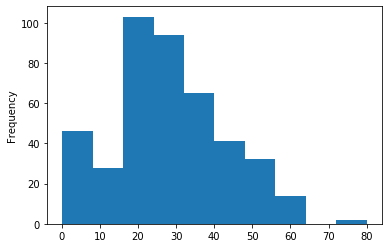

In [25]:
#age frequency distribution of those who survided 
# looks like there are some low/high age passangers who were more likely to survive 
mask['age'].plot.hist()

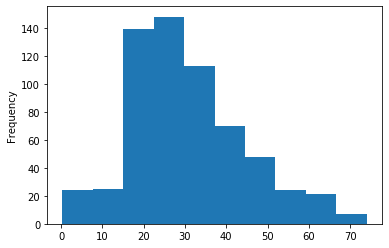

In [26]:
#age frequency distribution of those who did not survive 
mask_2['age'].plot.hist()

### Gaussian Distribution - Bell Curve 



In [27]:
from sklearn.naive_bayes import GaussianNB   #import Gaussian Bayes modeling function
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [28]:
#dataframe with predicting features
X = titanic_new.drop('survived', axis=1)

#column of predictive target values
y = titanic_new['survived']

In [29]:
#create training and test data
#will leave test size at default (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [30]:
gnb = GaussianNB()

In [31]:
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
#predictive score of the model on the training data, accuracy 
gnb.score(X_train, y_train)

0.7266922094508301

In [52]:
#test the model on unseen data
#score predictive values in variable
y_pred = gnb.predict(X_test)
#y_pred

In [53]:
cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Died', 'Predicted Survived'],
    index=['True Died', 'True Survived']
)

cm

,Predicted Died,Predicted Survived
True Died,110,57
True Survived,23,71


In [54]:
y_test.value_counts()

0    167
1     94
Name: survived, dtype: int64

In [55]:
gnb.score(X_test, y_test)

0.6934865900383141

In [56]:
#predictive score of the model for each predictive category
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.66      0.73       167
           1       0.55      0.76      0.64        94

    accuracy                           0.69       261
   macro avg       0.69      0.71      0.69       261
weighted avg       0.73      0.69      0.70       261



### Bernoulli's Naïve Bayes

Bernoull's Naïve Bayes classifier is best on a target variable that is binary (Boolean; True/False (1,0) values). Let's try this method on the dataset from the previous example.

In [57]:
#import Bernoulli Naïve Bayes function from scikit-learn library
from sklearn.naive_bayes import BernoulliNB

In [58]:
#initialize Bernoulli Naïve Bayes function to a variable
bnb = BernoulliNB()

In [59]:
#build the model with training data
bnb.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [60]:
bnb.score(X_train, y_train)

0.776500638569604

In [61]:
#test the model on unseen data
#score predictive values in variable
y_pred = bnb.predict(X_test)

In [62]:
#Confusion matrix shows which values model predicted correctly vs incorrectly

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Died', 'Predicted Survived'],
    index=['True Died', 'True Survived']
)

cm

,Predicted Died,Predicted Survived
True Died,152,15
True Survived,37,57


In [48]:
y_test.value_counts()

0    167
1     94
Name: survived, dtype: int64

In [47]:
#predictive score of the model on the test data
bnb.score(X_test, y_test)

0.8007662835249042

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       167
           1       0.79      0.61      0.69        94

    accuracy                           0.80       261
   macro avg       0.80      0.76      0.77       261
weighted avg       0.80      0.80      0.79       261

